In [1]:
%matplotlib inline

import thinkplot
import chap01soln
resp = chap01soln.ReadFemResp()

In [2]:
import thinkstats2
pmf = thinkstats2.Pmf(resp['numkdhh'])

# Q2 Ch3 Ex 1 Class size Paradox: Correcting Bias

In [3]:
d = {7:8, 12:8, 17:14, 22:4, 27: 6, 32: 12, 37:8, 42:3, 47:2}

In [5]:
pmf = thinkstats2.Pmf(d, label='actual')

In [7]:
print 'mean', pmf.Mean()

mean 23.6923076923


Compute distribution as observed by students where the probability associated with each class size is "biased" 

In [18]:
pmf.Items()

[(32, 0.18461538461538463),
 (37, 0.12307692307692308),
 (7, 0.12307692307692308),
 (42, 0.046153846153846156),
 (12, 0.12307692307692308),
 (47, 0.03076923076923077),
 (17, 0.2153846153846154),
 (22, 0.06153846153846154),
 (27, 0.09230769230769231)]

In [8]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x,x)
        
    new_pmf.Normalize()
    return new_pmf

In [22]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x,1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

In [26]:
biased_pmf = BiasPmf(pmf, 'biased')
unbiased_pmf = UnbiasPmf(biased_pmf, 'unbiased')

In [38]:
help(biased_pmf.Normalize)

Help on method Normalize in module thinkstats2:

Normalize(self, fraction=1.0) method of thinkstats2.Pmf instance
    Normalizes this PMF so the sum of all probs is fraction.
    
    Args:
        fraction: what the total should be after normalization
    
    Returns: the total probability before normalizing



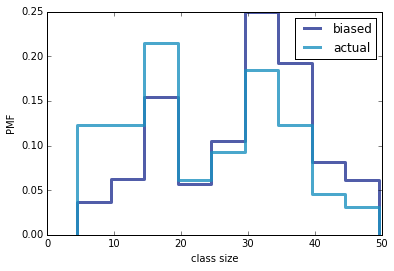

In [28]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([biased_pmf, pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

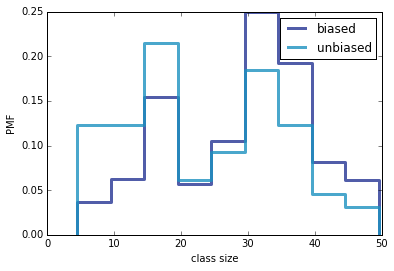

In [27]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([biased_pmf, unbiased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

# Q3 Ch4 Ex2: random distribution

In [59]:
import cumulative 
import random
import numpy as np
import matplotlib.pyplot as plt

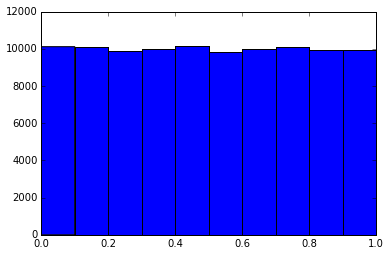

In [111]:
random_data = np.random.rand(100000)
n, bins, something_else = plt.hist(random_data)

In [92]:
def EvalCdf(sample,x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [93]:
values = [1, 2, 2, 3, 5]

In [96]:
EvalCdf(random_data, .9)

0.90133

{'xscale': 'linear', 'yscale': 'linear'}

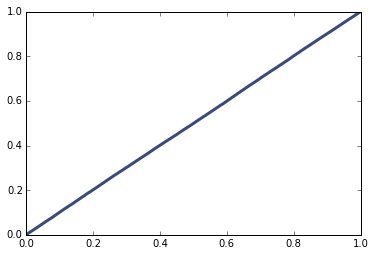

In [103]:
rank_cdf = thinkstats2.Cdf(random_data)
thinkplot.Cdf(rank_cdf)

# Q4 Think Stats Ch.5 Ex 1

Blue man group tryouts!

In [114]:
import scipy as sp

In [113]:
mu = 178.0
sigma = 7.7

In [149]:
limits_centimeters = (70*2.54, 73*2.54)
limits_centimeters

(177.8, 185.42000000000002)

#### Z-Criticals

In [180]:
z_criticals = map(lambda x: (x - mu)/sigma,\
                  limits_centimeters)
z_criticals

[-0.025974025974024498, 0.9636363636363657]

#### What percentage of the population falls within these bounds? (included CI)

In [201]:
lower, upper = map(lambda x: sp.stats.norm.cdf(x), z_criticals)
lower, upper

(0.48963902786483265, 0.83238586549630722)

In [251]:
print "%", round(100*(upper - lower), 2) , "Can be Blue Men"

% 34.27 Can be Blue Men


###### With Confidence Interval at 95%

In [238]:
SE = sigma/np.sqrt(414509)
bounds = [SE * i for i in sp.stats.norm.interval(.95)]
[(lower_lbound, upper_lbound),
 (lower_ubound, upper_ubound)]=\
[(lower + i, upper + i) for i in bounds]
print "Lower bound is: " , (lower_lbound, lower_ubound), "CI 95%"
print "Upper bound is: " , (upper_lbound, upper_ubound), "CI 95%"


Lower bound is:  (0.46619826000807729, 0.51307979572158802) CI 95%
Upper bound is:  (0.80894509763955191, 0.85582663335306253) CI 95%


In [252]:
print round((upper_lbound - lower_ubound)*100, 2), "%",\
round((upper_ubound - lower_lbound)*100, 2), "%",\
"CI: 95%",\
"Can be blue men",\

29.59 % 38.96 % CI: 95% Can be blue men
